In [ ]:
####### 01_Spatial Autocorrelation #######

In [1]:
import pandas as pd                # importing pandas package for data exploration
import geopandas as gpd            # importing geopandas for spatial operations
import urllib.request              # importing mpdule to open URLs
import zipfile                     # import module to read ZIP archive files
import os

In [2]:
## GETTING THE DATA

# downloading zip file with data, extract it and remove the zip file afterwards 

### ATTENTION!! THIS WILL AUTOMATICALLY DOWNLOAD THE DATA AND STORE IT IN YOUR DIRECTORY (8 files/572 KB) ###

# if the downloadlink does not work anymore, please contact arith@aqua.dtu.dk

urllib.request.urlretrieve("https://www.dropbox.com/s/ywsdhrrnsbni2wu/01_Spatial%20Autocorrelation.zip?dl=1", "01_Spatial Autocorrelation.zip")
zf = zipfile.ZipFile("01_Spatial Autocorrelation.zip")
zf.extractall()
zf.close()
os.remove("01_Spatial Autocorrelation.zip") # clean up

In [3]:
# reading and defining data frames from csv and from shp files

df_csv = pd.read_csv('under5mortality.csv')
df_shp = gpd.read_file('ne_110m_admin_0_countries.shp')

In [4]:
# cleaning dataframe from not needed colums

df_shp = df_shp.drop(columns=['ADM0_A3_UN','ADM0_A3_UN','REGION_WB','NAME_LEN','TINY','HOMEPART','NAME_KO','NAME_SV','NAME_TR','NAME_VI','NAME_ZH','ABBREV_LEN','LONG_LEN','SUBREGION','REGION_UN','CONTINENT','ADM0_A3_WB','ADM0_A3_US','ADM0_A3_IS','NAME_IT','MAX_LABEL','MIN_LABEL','MIN_ZOOM','WOE_NOTE','WOE_ID_EH','WOE_ID','WB_A3','WB_A2','UN_A3','ISO_A3_EH','LASTCENSUS','GDP_YEAR','GDP_YEAR','ECONOMY','INCOME_GRP','GU_A3','WIKIPEDIA','FIPS_10_','ISO_A2','NAME_BN','NAME_AR','NE_ID','WIKIDATAID','POP_YEAR','GDP_MD_EST','POP_RANK','POP_EST','MAPCOLOR13','MAPCOLOR9','MAPCOLOR8','MAPCOLOR7','NAME_ALT','NAME_SORT','NOTE_BRK','FORMAL_FR','NOTE_ADM0','NAME_CIAWF','FORMAL_EN','POSTAL','ADMIN','SUBUNIT','BRK_DIFF','NAME_LONG','BRK_A3','BRK_NAME','BRK_GROUP','ABBREV','NAME_ES','NAME_EN','NAME_DE','NAME_ID','NAME_HU','NAME_FR','SU_A3','GEOUNIT','SOVEREIGNT','ADM0_A3','SOV_A3','NAME_EL','SU_DIF','GEOU_DIF','TYPE','LEVEL','ADM0_DIF','featurecla','LABELRANK','scalerank','NAME_JA','NAME_NL','NAME_PL','NAME_PT','NAME_RU','NAME_HI' ])

In [5]:
# changing column name ISO_A3 of shapefile into ISO in order to match column name in csv (needed to merge both dataframes)

df_shp.rename(columns={'ISO_A3':'ISO'}, 
                 inplace=True)

In [6]:
# performing left join of dataframes

df_new = pd.merge(df_shp, df_csv, on='ISO', how='left') 

In [7]:
# creating shapefile with new ChildMortality attribute

import fiona
df_new.to_file("df_new.shp")

In [8]:
# new dataframe from df_new.shp

df_new1 = gpd.read_file('df_new.shp')

In [9]:
# getting rid of ChildMortality NULL values

df_new1 = df_new1.set_index("NAME")
df_new1 = df_new1.drop("W. Sahara", axis=0)
df_new1 = df_new1.drop("Norway", axis=0)
df_new1 = df_new1.drop("Falkland Is.", axis=0)
df_new1 = df_new1.drop("France", axis=0)
df_new1 = df_new1.drop("Puerto Rico", axis=0)
df_new1 = df_new1.drop("New Caledonia", axis=0)
df_new1 = df_new1.drop("Taiwan", axis=0)
df_new1 = df_new1.drop("Antarctica", axis=0)
df_new1 = df_new1.drop("N. Cyprus", axis=0)
df_new1 = df_new1.drop("Somaliland", axis=0)
df_new1 = df_new1.drop("Kosovo", axis=0)
df_new1 = df_new1.drop("Greenland", axis=0)
df_new1 = df_new1.drop("Fr. S. Antarctic Lands", axis=0)

In [10]:
df_new1  # showing merged data 

,ISO,ISO_N3,Unnamed_ 0,Name_1,ChildMorta,geometry
NAME,,,,,,
Fiji,FJI,242,181.0,Fiji,25.3,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,TZA,834,559.0,United Republic of Tanzania,54.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
Canada,CAN,124,97.0,Canada,5.1,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,USA,840,562.0,United States,6.6,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
Kazakhstan,KAZ,398,265.0,Kazakhstan,10.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
...,...,...,...,...,...,...
Macedonia,MKD,807,520.0,The former Yugoslav Republic of Macedonia,13.7,"POLYGON ((22.38053 42.32026, 22.88137 41.99930..."
Serbia,SRB,688,460.0,Serbia,5.7,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
Montenegro,MNE,499,346.0,Montenegro,3.5,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."


In [11]:


####### 02_Spatial Autocorrelation #######



In [12]:
import pandas as pd
import geopandas as gpd
#import seaborn as sns
#import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
import libpysal 
from libpysal import weights
from pysal.explore import esda
from pysal.viz import mapclassify

In [13]:
# generating a spatial weights matrix based on shared edges (Rook´s case)

w_rook = weights.Rook.from_dataframe(df_new1)
pd.DataFrame(w_rook.full()[0], 
             index=df_new1['ISO_N3'],
             columns=df_new1['ISO_N3'],
            ).astype(int)

C:\Users\arith\Anaconda3\envs\geoanalysis\lib\site-packages\libpysal\weights\weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
 There are 15 islands with ids: 0, 18, 39, 40, 71, 82, 127, 128, 129, 130, 135, 138, 146, 150, 162.
  warnings.warn(message)


ISO_N3,242,834,124,840,398,860,598,360,032,152,...,231,262,800,646,070,807,688,499,780,728
ISO_N3,,,,,,,,,,,,,,,,,,,,,
242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
834,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
124,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
840,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [14]:
# creating values for Randoom ChildMortality (hypothesis of complete spatial randomness)

np.random.seed(1234)
df_new1['Randoom ChildMortality'] = df_new1['ChildMorta'].sample(frac=1).values

In [15]:
# calculating Moran I

moran = esda.Moran(df_new1['ChildMorta'], w_rook)
moran.I

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 146, ' is an island (no neighbors)')
('WARNING: ', 150, ' is an island (no neighbors)')
('WARNING: ', 162, ' is an island (no neighbors)')


0.739327439380855

In [16]:
moran.p_sim   # 0.001 = statistically significant!

0.001

In [17]:
moran_shuffled = esda.Moran(df_new1['Randoom ChildMortality'], w_rook)
moran_shuffled.I

-0.05395168550128122

In [18]:
moran_shuffled.p_sim

0.237

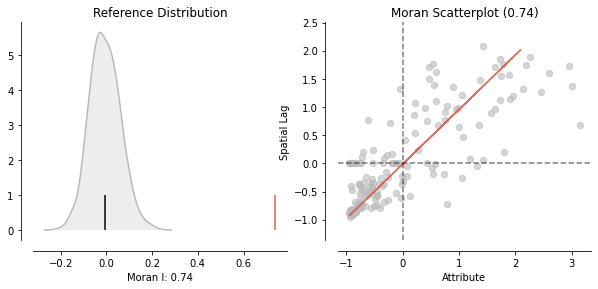

In [19]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()